# we have to predict the number of positive and negative reviews based on Label by using  classification models.

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score





In [2]:
import pandas as pd  
df=pd.read_csv('/content/movie.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
#Summary of the dataset
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [5]:
#Identifing missing Values
df.isna().sum()

text     0
label    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'label distribution')

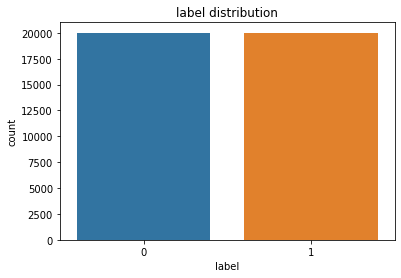

In [6]:
#Count plot for Species
sns.countplot('label',data = df)
plt.title("label distribution")

In [7]:
## Get the Independent Features

X=df.drop('label',axis=1)
X.head()

,text
0,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...


In [8]:
## Get the Dependent features

y=df['label']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [9]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head()

,index,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,4,Im a die hard Dads Army fan and nothing will e...,1


In [10]:
messages['text'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [13]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')


tfv.fit(list(X_train) + list(X_test))
X_train_tfv =  tfv.transform(X_train) 
X_test_tfv = tfv.transform(X_test)

In [14]:
clf = LogisticRegression(C=1.0)
clf.fit(X_train_tfv, y_train)
predictions = clf.predict(X_test_tfv)
target=['False','True']
print ( classification_report(y_test, predictions,target_names=target))

              precision    recall  f1-score   support

       False       0.91      0.88      0.89      2002
        True       0.88      0.91      0.90      1998

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [15]:
##Multinomial naive bayes Algorithm
clf = MultinomialNB()
clf.fit(X_train_tfv, y_train)
predictions = clf.predict(X_test_tfv )

print ( classification_report(y_test, predictions,target_names=target))

              precision    recall  f1-score   support

       False       0.88      0.88      0.88      2002
        True       0.88      0.88      0.88      1998

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000

